## Import Lib

In [144]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Funtions

In [92]:
def find_between(s, first, last):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

## Load Data from CSV File

In [108]:
df = pd.read_csv('titanic3.csv')

In [121]:
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,enc_sex,enc_title
249,1,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,160.809917,"Haverford, PA / Cooperstown, NY",Master,1,8
930,3,0,"Kiernan, Mr. Philip",male,44.0,1,0,367229,7.7500,NaN,Q,NaN,160.809917,NaN,Mr,1,12
1000,3,1,"McCormack, Mr. Thomas Joseph",male,33.0,0,0,367228,7.7500,NaN,Q,NaN,160.809917,NaN,Mr,1,12
471,2,1,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S,9,160.809917,"London / New York, NY",Mrs,0,13
983,3,0,"MacKay, Mr. George William",male,32.0,0,0,C.A. 42795,7.5500,NaN,S,NaN,160.809917,NaN,Mr,1,12
184,1,0,"Lewy, Mr. Ervin G",male,35.0,0,0,PC 17612,27.7208,NaN,C,NaN,160.809917,"Chicago, IL",Mr,1,12
505,2,0,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,NaN,S,NaN,271.000000,"Copenhagen, Denmark",Mr,1,12
228,1,0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C,NaN,160.809917,"Madrid, Spain",Mr,1,12
223,1,0,"Parr, Mr. William Henry Marsh",male,28.5,0,0,112052,0.0000,NaN,S,NaN,160.809917,Belfast,Mr,1,12
682,3,0,"Bourke, Miss. Mary",female,9.0,0,2,364848,7.7500,NaN,Q,NaN,160.809917,"Ireland Chicago, IL",Miss,0,9


In [110]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Missing value

In [117]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body            0
home.dest     564
title           0
enc_sex         0
enc_title       0
dtype: int64

In [112]:
df['age'].fillna(method='ffill',inplace=True)
df['fare'].fillna(method='ffill',inplace=True)
df['embarked'].fillna(method='ffill',inplace=True)
df['body'].fillna(df['body'].mean(),inplace=True)
df['title'] = df.apply(lambda row: find_between(row['name'], ", ", "."), axis=1)

## LabelEncoder

In [116]:
df['enc_sex'] = LabelEncoder().fit_transform(df['sex'])
df['enc_title'] = LabelEncoder().fit_transform(df['title'])

## Correlation

C:\Users\thana\AppData\Local\Temp\ipykernel_11040\1465551148.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(10,145,n=100))


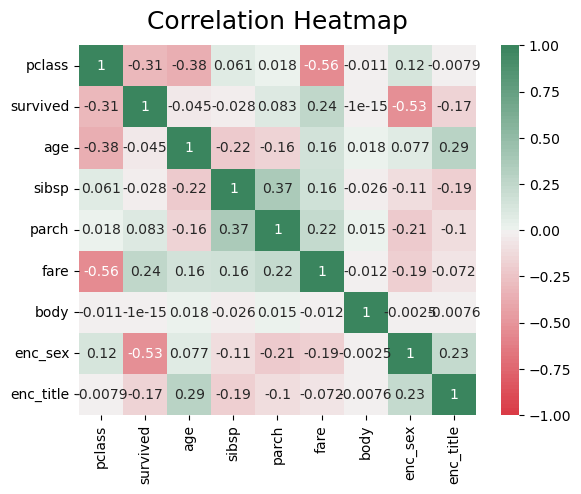

In [118]:
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(10,145,n=100))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [215]:
from sklearn.model_selection import train_test_split
x = df[['pclass', 'age', 'sibsp', 'parch',  'body', 'enc_sex', 'enc_title']]
y=df['survived']

In [216]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [211]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
x = pca.fit_transform(x)

In [217]:
x_train , x_test , y_train , y_test = train_test_split(x,y)

In [220]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(model.score(x_test, y_test))

0.7896341463414634


<Axes: >

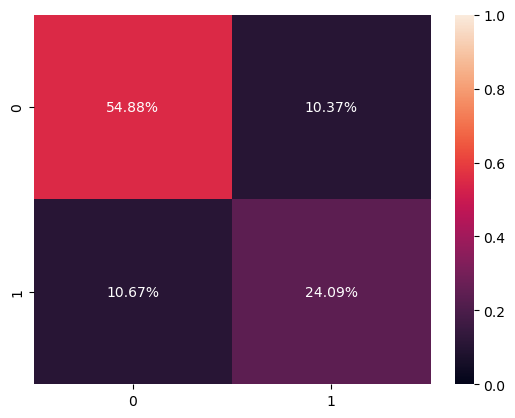

In [219]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%',vmin=0,vmax=1)